**Import required libraries and modules**

In [225]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score
import pandas as pd
import numpy as np
from sklearn import preprocessing
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)


**Read the data**

In [168]:
df = pd.read_csv('portu_banking_final.csv')
df.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,210,1,999.0,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,138,1,999.0,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,339,3,6.0,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,185,2,999.0,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,137,1,3.0,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  object 
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  float64
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp_var_rate    41188 non-null  float64
 16  cons_price_idx  41188 non-null  float64
 17  cons_conf_idx   41188 non-null 

In [170]:
df.describe()

,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
count,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,258.285010,2.567593,963.568005,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.112654
std,259.279249,2.770014,211.772296,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528,0.316173
min,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,4918.000000,56.000000,9999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


In [171]:
for col in df.select_dtypes(include='object').columns:
  print(col)
  print(df[col].unique())

age
['44' '53' '28' '39' '55' '30' '37' '36' '27' '34' '41' '33' '26' '52'
 '35' '40' '32' '49' '38' '47' '46' '29' '54' '42' '72' '48' '43' '56'
 '31' '24' '68' '59' '50' '45' '35-30' '25' '57' '63' '58' '60' '30-35'
 '64' '51' '23' '20' '74' '80' '61' '25-30' '62' '75' '21' '82' '77'
 '18-25' '30-32' '70' '50-55' '76' '73' '66' '22' '71' '19' '79' '88' '65'
 '67' '81' '18' '84' '69' '98' '85' '83' '78' '92' '45-50' '20-25' '20-40'
 '35-40' '86' '94' '17' '91' '89' '87' '95' '30-40' 56 39 30 53 37 22 45
 31 24 50 58 33 27 28 32 51 41 49 43 44 35 29 26 57 25 42 48 46 67 38 34
 54 40 23 47 62 75 55 36 52 59 78 70 60 20 66 61 21 88 18 68 71 73 80 79
 63 76 83 65 19 86 17 72 69 81 64 77 74 85 82]
job
['blue-collar' 'technician' 'management' 'services' 'retired' 'admin.'
 'housemaid' 'unemployed' 'entrepreneur' 'self-employed' 'unknown'
 'student' 'MANAGEMENT' 'RETIRED' 'STUDENT' 'ADMIN.' 'TECHNICIAN'
 'BLUE-COLLAR' 'HOUSEMAID' 'SERVICES' 'UNKNOWN']
marital
['married' 'single' 'divorced' '

In [172]:
j = {'MANAGEMENT':'management', 'RETIRED':'retired', 'STUDENT':'student', 'ADMIN.':'admin', 'TECHNICIAN':'technician', 'BLUE-COLLAR':'blue-collar', 'HOUSEMAID':'housemaid', 'SERVICES':'services', 'UNKNOWN':'unknown', 'admin.':'admin'}

df.job = df.job.map(j)

In [173]:
for col in df.select_dtypes(include='object').columns:
  print(col)
  print(df[col].unique())

age
['44' '53' '28' '39' '55' '30' '37' '36' '27' '34' '41' '33' '26' '52'
 '35' '40' '32' '49' '38' '47' '46' '29' '54' '42' '72' '48' '43' '56'
 '31' '24' '68' '59' '50' '45' '35-30' '25' '57' '63' '58' '60' '30-35'
 '64' '51' '23' '20' '74' '80' '61' '25-30' '62' '75' '21' '82' '77'
 '18-25' '30-32' '70' '50-55' '76' '73' '66' '22' '71' '19' '79' '88' '65'
 '67' '81' '18' '84' '69' '98' '85' '83' '78' '92' '45-50' '20-25' '20-40'
 '35-40' '86' '94' '17' '91' '89' '87' '95' '30-40' 56 39 30 53 37 22 45
 31 24 50 58 33 27 28 32 51 41 49 43 44 35 29 26 57 25 42 48 46 67 38 34
 54 40 23 47 62 75 55 36 52 59 78 70 60 20 66 61 21 88 18 68 71 73 80 79
 63 76 83 65 19 86 17 72 69 81 64 77 74 85 82]
job
[nan 'admin' 'management' 'retired' 'student' 'technician' 'blue-collar'
 'housemaid' 'services' 'unknown']
marital
['married' 'single' 'divorced' 'D' 'unknown' 'S' 'M']
education
['basic.4y' 'unknown' 'university.degree' 'high.school' 'basic.9y'
 'professional.course' 'basic.6y' 'basic-6y' '

In [174]:
df.apply(lambda x: len(x.unique()))

age                159
job                 10
marital              7
education           11
default              3
housing              3
loan                 3
contact              2
month               10
day_of_week          5
duration          1544
campaign            42
pdays               28
previous             8
poutcome             3
emp_var_rate        10
cons_price_idx      26
cons_conf_idx       26
euribor3m          316
nr_employed         11
y                    2
dtype: int64

Check for missing values

In [175]:
miss_val = df.isna().sum()
miss_val

age                   0
job               30753
marital               0
education             0
default               0
housing               0
loan                  0
contact               0
month                 0
day_of_week           0
duration              0
campaign              0
pdays                 0
previous              0
poutcome              0
emp_var_rate          0
cons_price_idx        0
cons_conf_idx         0
euribor3m             0
nr_employed           0
y                     0
dtype: int64

**Exploratory Data Analysis**

In [176]:
df["job"].unique()

array([nan, 'admin', 'management', 'retired', 'student', 'technician',
       'blue-collar', 'housemaid', 'services', 'unknown'], dtype=object)

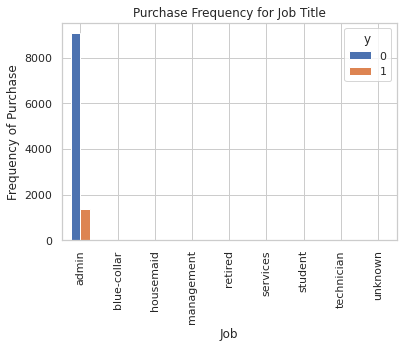

In [226]:
%matplotlib inline
pd.crosstab(df.job,df.y).plot(kind='bar')
plt.title('Purchase Frequency for Job Title')
plt.xlabel('Job')
plt.ylabel('Frequency of Purchase')
plt.savefig('purchase_fre_job')

The frequency of buying a deposit largely depends on the position of the client. Therefore, this indicator can serve as a good predictor of the final variable

In [178]:
df["age"].unique()

array(['44', '53', '28', '39', '55', '30', '37', '36', '27', '34', '41',
       '33', '26', '52', '35', '40', '32', '49', '38', '47', '46', '29',
       '54', '42', '72', '48', '43', '56', '31', '24', '68', '59', '50',
       '45', '35-30', '25', '57', '63', '58', '60', '30-35', '64', '51',
       '23', '20', '74', '80', '61', '25-30', '62', '75', '21', '82',
       '77', '18-25', '30-32', '70', '50-55', '76', '73', '66', '22',
       '71', '19', '79', '88', '65', '67', '81', '18', '84', '69', '98',
       '85', '83', '78', '92', '45-50', '20-25', '20-40', '35-40', '86',
       '94', '17', '91', '89', '87', '95', '30-40', 56, 39, 30, 53, 37,
       22, 45, 31, 24, 50, 58, 33, 27, 28, 32, 51, 41, 49, 43, 44, 35, 29,
       26, 57, 25, 42, 48, 46, 67, 38, 34, 54, 40, 23, 47, 62, 75, 55, 36,
       52, 59, 78, 70, 60, 20, 66, 61, 21, 88, 18, 68, 71, 73, 80, 79, 63,
       76, 83, 65, 19, 86, 17, 72, 69, 81, 64, 77, 74, 85, 82],
      dtype=object)

In [179]:
df.age = pd.to_numeric(df.age, errors='coerce').fillna(0).astype(np.int64)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             10435 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  float64
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp_var_rate    41188 non-null  float64
 16  cons_price_idx  41188 non-null  float64
 17  cons_conf_idx   41188 non-null 

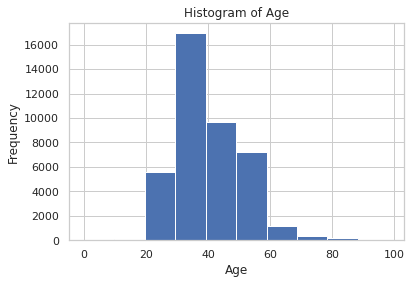

In [227]:
df.age.hist()
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('hist_age')

Most of the bank customers in this dataset are in their 30s and 40s

Text(0, 0.5, 'Proportion of Customers')

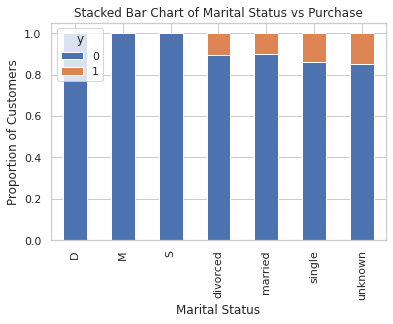

In [228]:
table=pd.crosstab(df.marital,df.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Marital Status vs Purchase')
plt.xlabel('Marital Status')
plt.ylabel('Proportion of Customers')

In [182]:
df.groupby(['marital']).mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
marital,,,,,,,,,,,
D,39.000000,87.500000,1.250000,999.000000,0.000000,1.250000,93.974250,-37.675000,4.909750,5209.550000,0.000000
M,41.400000,418.400000,2.600000,999.000000,0.200000,-0.960000,92.931400,-37.560000,2.589200,5141.540000,0.000000
S,28.666667,283.333333,2.000000,999.000000,0.000000,-0.233333,93.396333,-34.733333,3.531333,5152.733333,0.000000
divorced,44.892795,253.934679,2.614583,968.613498,0.168837,0.163043,93.606244,-40.709701,3.714567,5170.845074,0.103299
married,42.295831,257.406332,2.572804,967.963528,0.155599,0.183854,93.597501,-40.271203,3.746064,5171.854853,0.101593
single,33.150195,261.518720,2.533939,952.231474,0.211414,-0.167972,93.517331,-40.920303,3.317391,5155.199905,0.140078
unknown,40.275000,312.725000,3.187500,937.100000,0.275000,-0.221250,93.471250,-40.820000,3.313038,5157.393750,0.150000


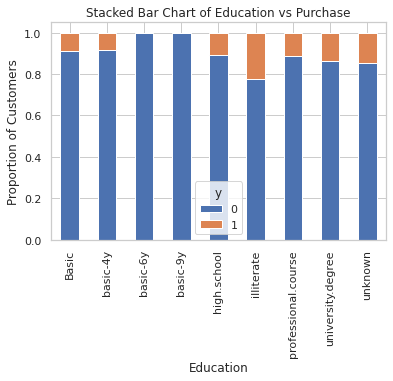

In [229]:
table=pd.crosstab(df.education,df.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Education vs Purchase')
plt.xlabel('Education')
plt.ylabel('Proportion of Customers')
plt.savefig('edu_vs_pur_stack')

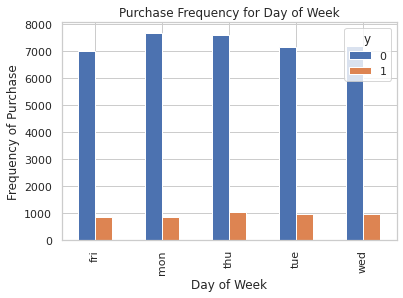

In [230]:
pd.crosstab(df.day_of_week,df.y).plot(kind='bar')
plt.title('Purchase Frequency for Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Frequency of Purchase')
plt.savefig('pur_dayofweek_bar')

Education appears to be a good predictor of the outcome variable

In [185]:
df['education']=np.where(df['education'] =='basic.9y', 'Basic', df['education'])
df['education']=np.where(df['education'] =='basic.6y', 'Basic', df['education'])
df['education']=np.where(df['education'] =='basic.4y', 'Basic', df['education'])

df.education.unique()

array(['Basic', 'unknown', 'university.degree', 'high.school',
       'professional.course', 'basic-6y', 'basic-9y', 'basic-4y',
       'illiterate'], dtype=object)

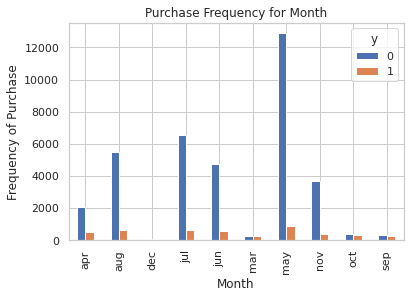

In [231]:
pd.crosstab(df.month,df.y).plot(kind='bar')
plt.title('Purchase Frequency for Month')
plt.xlabel('Month')
plt.ylabel('Frequency of Purchase')
plt.savefig('pur_fre_month_bar')

The month can be a good predictor

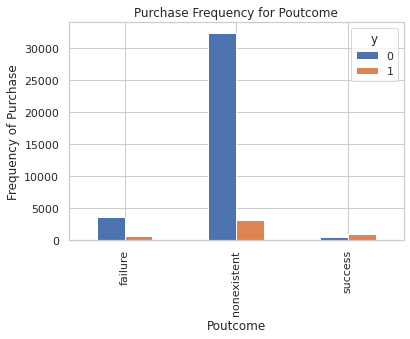

In [232]:
pd.crosstab(df.poutcome,df.y).plot(kind='bar')
plt.title('Purchase Frequency for Poutcome')
plt.xlabel('Poutcome')
plt.ylabel('Frequency of Purchase')
plt.savefig('pur_fre_pout_bar')


Poutcome seems like a good predictor

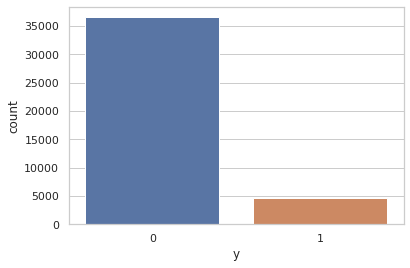

<Figure size 432x288 with 0 Axes>

In [233]:
sns.countplot(x='y', data=df)
plt.show()
plt.savefig('count_plot')

In [190]:
count_no_sub = len(df[df['y']==0])
count_sub = len(df[df['y']==1])
pct_of_no_sub = count_no_sub/(count_no_sub+count_sub)
print("percentage of no subscription is", pct_of_no_sub*100)
pct_of_sub = count_sub/(count_no_sub+count_sub)
print("percentage of subscription", pct_of_sub*100)

percentage of no subscription is 88.73458288821988
percentage of subscription 11.265417111780131


Our classes are not balanced and the ratio of unsigned to signed is 89:11. Before we move on to balancing, let's do some more research.

In [191]:
df.groupby('y').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
y,,,,,,,,,,
0,39.898791,220.844807,2.633085,985.345135,0.132374,0.248875,93.603757,-40.593097,3.811491,5176.166600
1,40.913147,553.191164,2.051724,792.035560,0.492672,-1.233448,93.354386,-39.789784,2.123135,5095.115991


The average age of consumers who bought a term deposit is higher than those who did not buy it.

pdays (days elapsed since the last contact with the client) is understandably lower for those who bought a deposit. The lower the pdays indicator, the better the memory of the last call and the higher the chances of a successful sale.

Surprisingly, the campaigns indicator (the number of hits or calls made during the current campaign) is lower for consumers who have bought a term deposit.

In [192]:
df.groupby(['education']).mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
education,,,,,,,,,,,
Basic,42.145935,263.161153,2.558670,976.345455,0.140969,0.191013,93.639686,-40.925871,3.729493,5172.016428,0.087145
basic-4y,48.916667,259.750000,4.250000,915.916667,0.250000,0.166667,93.747500,-42.225000,3.615083,5167.266667,0.083333
basic-6y,39.833333,222.500000,2.500000,999.000000,0.000000,0.766667,93.784667,-39.933333,4.313333,5194.233333,0.000000
basic-9y,44.400000,144.900000,1.600000,999.000000,0.200000,0.270000,93.732300,-42.120000,3.716900,5161.490000,0.000000
high.school,37.989280,260.886810,2.568576,964.358382,0.185917,0.032937,93.584857,-40.940641,3.556157,5164.994735,0.108355
illiterate,48.500000,276.777778,2.277778,943.833333,0.111111,-0.133333,93.317333,-39.950000,3.516556,5171.777778,0.222222
professional.course,40.069807,252.533855,2.586115,962.482548,0.163075,0.173012,93.569864,-40.124108,3.710457,5170.155979,0.113485
university.degree,38.864481,253.223373,2.563527,953.286982,0.192390,-0.028090,93.493466,-39.975805,3.529663,5163.226298,0.137245
unknown,43.481225,262.390526,2.596187,942.830734,0.226459,0.059099,93.658615,-39.877816,3.571098,5159.549509,0.145003


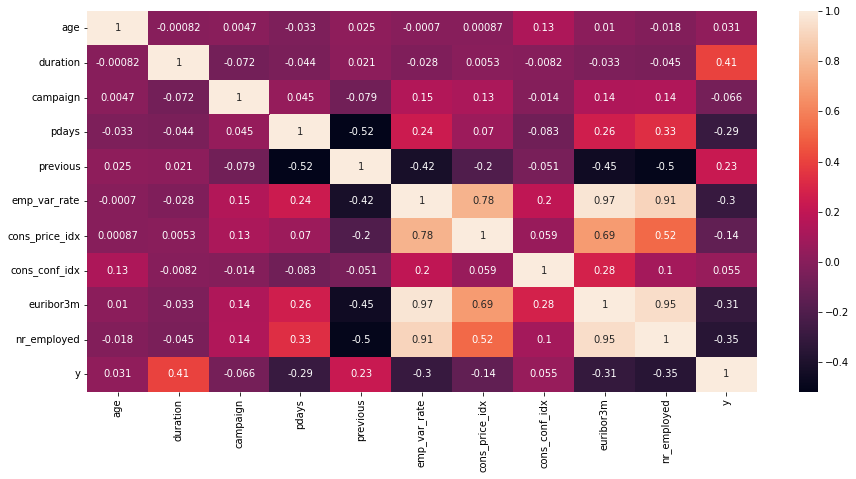

In [193]:
cor_mat=df.corr()
fig = plt.figure(figsize=(15,7))
sns.heatmap(cor_mat,annot=True)

**Categorical Variable Encoding**

Next steps:

Create a list of all categorical variables

Initiate an empty list to store the categorical variables

Append the variables with 'categoric' data type in the list 'categorical'

In [194]:
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype

categorical=[]

for column in df:
    if is_string_dtype(df[column]):
        categorical.append(column)


Assign x and y variables 

In [195]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

Select and assign all numeric features 

In [196]:
df_numeric_features =X.select_dtypes(include=np.number)
df_numeric_features.head()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
0,44,210,1,999.0,0,1.4,93.444,-36.1,4.963,5228.1
1,53,138,1,999.0,0,-0.1,93.200,-42.0,4.021,5195.8
2,28,339,3,6.0,2,-1.7,94.055,-39.8,0.729,4991.6
3,39,185,2,999.0,0,-1.8,93.075,-47.1,1.405,5099.1
4,55,137,1,3.0,1,-2.9,92.201,-31.4,0.869,5076.2


Select and assign all categorical features 

In [197]:
df_categoric_features = df.select_dtypes(include = object)
df_categoric_features.columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome'],
      dtype='object')

Create dummy variables for your categorial variables
A dummy variable is a binary variable that indicates whether a separate categorical variable takes on a specific value.

In [198]:
dummy_encoded_variables = pd.get_dummies(df_categoric_features, drop_first = True)

Assign dummy variables to new data frame

In [199]:
df2 = pd.concat([df_numeric_features, dummy_encoded_variables], axis=1)

Assign new data frame to X

In [200]:
X=df2

Check data type of y

In [201]:
y.dtypes

dtype('int64')

**Preliminary Training**

Import sklearn. Scikit-learn is the most useful and robust library for machine learning in Python. It provides a selection of efficient tools for machine learning and statistical modeling including classification, regression, clustering and dimensionality reduction via a consistence interface in Python.

In [202]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score

x_train contains the values of the features, y_train contains the target output corresponding to x_train values,x_test contains the values of the features to be tested after training. 

There's a class in the library which is, aptly, named 'train_test_split. ... test_size — This parameter decides the size of the data that has to be split as the test dataset. This is given as a fraction. For example, we pass 0.2 as the value, the dataset will be split 20% as the test dataset.

In [203]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Model fitting is a measure of how well a machine learning model generalizes to similar data to that on which it was trained. In our case it's a supervised learning, this accepts two arguments: the data X and the labels y

In [204]:
model = LogisticRegression()
model.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

The goal of Logistic Regression is to discover a link between characteristics and the likelihood of a specific outcome. In our case predict if the client will subscribe a term deposit (variable y) based on based on many factors(job, education, etc), the response variable has two values: pass and fail.

In [205]:
predictions = model.predict(x_test)
print(predictions)
print( classification_report(y_test, predictions) )

[0 0 0 ... 0 0 0]
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7335
           1       0.64      0.39      0.48       903

    accuracy                           0.91      8238
   macro avg       0.79      0.68      0.72      8238
weighted avg       0.90      0.91      0.90      8238



Let's check the values of the features to be tested after training

In [206]:
x_test

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,job_blue-collar,job_housemaid,job_management,job_retired,job_services,job_student,job_technician,job_unknown,marital_M,marital_S,marital_divorced,marital_married,marital_single,marital_unknown,education_basic-4y,education_basic-6y,education_basic-9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_unknown,default_yes,housing_unknown,housing_yes,loan_unknown,loan_yes,contact_telephone,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
3905,59,309,5,999.0,0,1.4,94.465,-41.8,4.958,5228.1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0
35229,52,215,3,999.0,0,-0.1,93.200,-42.0,4.191,5195.8,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0
34505,32,728,1,999.0,0,-0.1,93.200,-42.0,4.076,5195.8,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0
29836,34,1000,1,999.0,0,1.1,93.994,-36.4,4.860,5191.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0
17653,29,179,4,999.0,0,1.4,93.918,-42.7,4.960,5228.1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36523,33,136,1,999.0,0,1.4,93.444,-36.1,4.967,5228.1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0
31490,42,116,2,999.0,0,-0.1,93.200,-42.0,4.191,5195.8,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0
3865,48,219,1,999.0,1,-0.1,93.200,-42.0,4.191,5195.8,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
10794,32,56,1,999.0,0,-1.8,92.893,-46.2,1.313,5099.1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0


Check the data wich has category labels for our test data

In [207]:
y_test

3905     0
35229    0
34505    1
29836    0
17653    0
        ..
36523    0
31490    0
3865     0
10794    0
17096    0
Name: y, Length: 8238, dtype: int64

Our prediction result of logistic regression is suppose to be in the interval [0, 1]

In [208]:
predictions

array([0, 0, 0, ..., 0, 0, 0])

Check our accuracy of the model

In [209]:
print( "The accuracy of the Model",accuracy_score(y_test, predictions))

The accuracy of the Model 0.9094440398154892


In [77]:
y.value_counts(normalize=True)

0    0.887346
1    0.112654
Name: y, dtype: float64

In [235]:
from sklearn.metrics import confusion_matrix


In [237]:
cm = confusion_matrix(y_test, predictions)
print(cm)

[[7141  194]
 [ 552  351]]


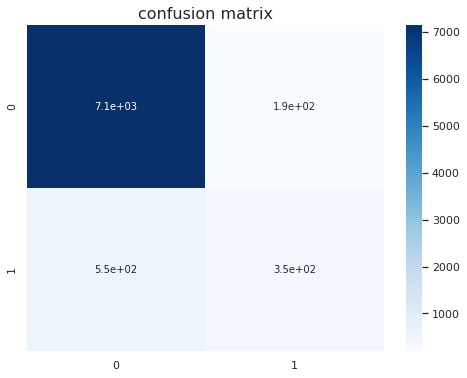

In [239]:
plt.figure(figsize=(8,6))
plt.title('confusion matrix', size=16)
sns.heatmap(cm, cmap='Blues', annot=True)

**Let's Improve the performance**

Oversampling with **SMOTE**
After creating our training data, I increased the sampling rate of non-subscribers using the SMOTE (Synthetic Minority Class Example Duplicate Technique) algorithm. High Level SMOTE:
creates a synthetic origin based on the choice of a minor class (unsigned) instead of making copies of them;
randomly selected from nearest k-neighbors and uses it for detection, but randomly changing them to be discovered.

In [140]:
import imblearn
from imblearn.over_sampling import SMOTE
sm=SMOTE(random_state=42)
X_sm, y_sm = sm.fit_resample(X, y)
print(f'''Shape of X before SMOTE: {X.shape}
Shape of X after SMOTE: {X_sm.shape}''')


Shape of X before SMOTE: (41188, 54)
Shape of X after SMOTE: (73096, 54)


In [78]:
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns
os_data_X,os_data_y=os.fit_resample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['y'])
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of no subscription in oversampled data",len(os_data_y[os_data_y['y']==0]))
print("Number of subscription",len(os_data_y[os_data_y['y']==1]))
print("Proportion of no subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==0])/len(os_data_X))
print("Proportion of subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==1])/len(os_data_X))

length of oversampled data is  51134
Number of no subscription in oversampled data 25567
Number of subscription 25567
Proportion of no subscription data in oversampled data is  0.5
Proportion of subscription data in oversampled data is  0.5


In [143]:
y_sm.value_counts()

1    36548
0    36548
Name: y, dtype: int64

In [146]:
model = LogisticRegression()
X_train,X_test,y_train,y_test=train_test_split(X_sm,y_sm,test_size=0.75)
model.fit(X_train, y_train)
preds=model.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [147]:
from sklearn.metrics import accuracy_score,recall_score

Let's check confusion matrix with SMOTE. A Confusion matrix is an N x N matrix used for evaluating the performance of a classification model, where N is the number of target classes. The matrix compares the actual target values with those predicted by the machine learning model.

In [234]:
from sklearn.metrics import confusion_matrix

In [150]:
cm = confusion_matrix(y_test, preds)
print(cm)

[[24688  2727]
 [ 2599 24808]]


Next we will check our accuracy and recall in confusion matrix. 

Accuracy (ACC) is calculated as the number of all correct predictions divided by the total number of the dataset.

The recall is the ratio of the relevant results returned by the search engine to the total number of the relevant results that could have been returned.

Accuracy = 0.90
Recall = 0.91



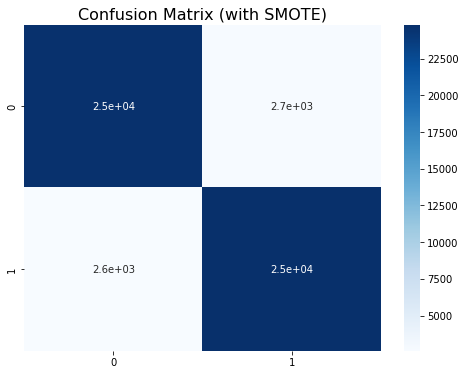

In [148]:
print(f'Accuracy = {accuracy_score(y_test, preds):.2f}\nRecall = {recall_score(y_test, preds):.2f}\n')
cm = confusion_matrix(y_test, preds)
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix (with SMOTE)', size=16)
sns.heatmap(cm, annot=True, cmap='Blues');


Assign new data frame to original

In [164]:
df2['y']=df['y']
cols=df2.columns
df2.shape

(41188, 55)

In [84]:
ncols=[]
for i in range(0,46):
  if rfe.support_[i]==True:
    ncols= ncols + [cols[i]]
print(ncols)

['previous', 'emp_var_rate', 'marital_divorced', 'marital_married', 'marital_single', 'education_high.school', 'education_professional.course', 'education_university.degree', 'education_unknown', 'default_unknown', 'housing_unknown', 'housing_yes', 'loan_unknown', 'loan_yes', 'contact_telephone', 'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_may', 'month_nov']


In [155]:
#Feature selection 
#Recursive feature elimination
from sklearn.feature_selection import RFE

#Select best feature 
rfe = RFE(model, n_features_to_select= None)
rfe = rfe.fit(X_train, y_train)

#Summarize the selection of the attributes
print(rfe.support_)
print(rfe.ranking_)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


[False False False False  True False False False False False False False
 False False False False False False False False  True  True  True  True
 False False False  True False  True  True  True  True False  True  True
  True  True  True  True False  True  True False  True  True False  True
  True  True  True  True  True  True]
[12 11  4 13  1  5  6  8  2 10 20 24 23 14 26 22 27 25 15 28  1  1  1  1
 16 18 21  1  9  1  1  1  1 19  1  1  1  1  1  1  7  1  1  3  1  1 17  1
  1  1  1  1  1  1]


In [161]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score,recall_score,precision_score, confusion_matrix
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

# Predicting Test Set
y_pred = classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['Logistic Regression RFE ', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])


model_results


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression RFE,0.902849,0.900962,0.90517,0.903061


Recursive feature elimination (RFE) is based on iterative model building and selecting the best or worst performing feature, separating that feature, and iterating on the remaining ones. This process is applied until the dataset runs out of features. The goal of RFE is to select features by recursively considering a smaller and smaller set of features.

In [80]:
data_final_vars=df2.columns.values.tolist()
y=['y']
X=[i for i in data_final_vars if i not in y]
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
rfe = RFE(logreg)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


[False False False False  True  True False False False False False False
 False False False False False False False False  True  True  True False
 False False False  True False  True  True  True  True False  True  True
  True  True  True  True  True  True  True False  True  True False False
  True  True  True  True  True  True]
[10  9  2 11  1  1  4  5  3  7 25 26 19 28 21 24 20 27 14 18  1  1  1  8
 13 22 17  1 16  1  1  1  1 23  1  1  1  1  1  1  1  1  1  6  1  1 15 12
  1  1  1  1  1  1]
